In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

#### 1. Read the google train data file

In [2]:
df = pd.read_csv('GOOG_train.csv')

In [3]:
df.shape

(1258, 7)

#### 2. Basic information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


#### Statistical info of given data

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


#### Null values in each column

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### 3. 'Close' column as training data

In [7]:
df_close = df['Close']
df_close

0        719.409973
1        718.359985
2        718.270020
3        718.919983
4        710.359985
           ...     
1253    2404.610107
1254    2451.760010
1255    2466.090088
1256    2482.850098
1257    2491.399902
Name: Close, Length: 1258, dtype: float64

In [8]:
df_close = pd.DataFrame(df_close)
df_close

,Close
0,719.409973
1,718.359985
2,718.270020
3,718.919983
4,710.359985
...,...
1253,2404.610107
1254,2451.760010
1255,2466.090088
1256,2482.850098


#### 4. Scaling values using minmax scaler

In [9]:
scaler = MinMaxScaler()
df_close_scaled = scaler.fit_transform(df_close)
df_close_scaled

array([[0.02805597],
       [0.02748005],
       [0.0274307 ],
       ...,
       [0.98611746],
       [0.9953104 ],
       [1.        ]])

In [10]:
df_close_scaled.shape

(1258, 1)

#### Creating x_train and y_train and converting into numpy array

In [11]:
x_train = []
y_train = []
for i in range(30,1258):
    x_train.append(df_close_scaled[i-30:i,0])
    y_train.append(df_close_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(1228, 30)

In [13]:
y_train.shape

(1228,)

#### Reshaping the x_train

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1228, 30, 1)

#### Creating and compiling LSTM model

In [15]:
model = Sequential()
model.add(LSTM(units=400,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(units=300,return_sequences=True))
model.add(LSTM(units=150,return_sequences=True))
model.add(LSTM(units=100,return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

#### Fitting data into the model

In [16]:
hist = model.fit(x_train,y_train, epochs=50, batch_size = 32, verbose=1)

Epoch 1/50
39/39 [==============================] - 19s 324ms/step - loss: 0.0251
Epoch 2/50
39/39 [==============================] - 13s 344ms/step - loss: 0.0016
Epoch 3/50
39/39 [==============================] - 20s 511ms/step - loss: 0.0014
Epoch 4/50
39/39 [==============================] - 20s 502ms/step - loss: 0.0012
Epoch 5/50
39/39 [==============================] - 19s 476ms/step - loss: 0.0011
Epoch 6/50
39/39 [==============================] - 18s 470ms/step - loss: 0.0010
Epoch 7/50
39/39 [==============================] - 17s 431ms/step - loss: 0.0011
Epoch 8/50
39/39 [==============================] - 14s 349ms/step - loss: 0.0011
Epoch 9/50
39/39 [==============================] - 16s 412ms/step - loss: 0.0011
Epoch 10/50
39/39 [==============================] - 16s 406ms/step - loss: 8.7816e-04
Epoch 11/50
39/39 [==============================] - 14s 347ms/step - loss: 0.0010
Epoch 12/50
39/39 [==============================] - 14s 361ms/step - loss: 7.6819e-04
Epoch

#### Plotting loss for each epochs

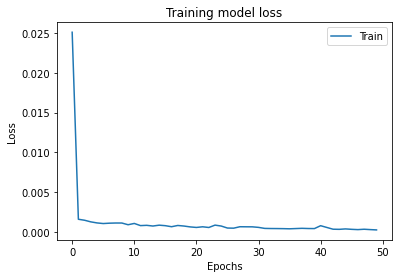

In [17]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'],loc = 'upper right')
plt.show()

#### Loading test data

In [18]:
testdata=pd.read_csv("GOOG_test.csv")
testdata['Close']=pd.to_numeric(testdata.Close,errors='coerce')
testdata = testdata.dropna()
testdata = testdata.iloc[:,4:5]
y_test = testdata.iloc[30:,0:].values

#### 'Close' column as our test data

In [19]:
testdata['Close']

0      2521.600098
1      2513.929932
2      2527.040039
3      2520.659912
4      2513.929932
          ...     
248    2291.280029
249    2340.209961
250    2344.590088
251    2344.760010
252    2298.360107
Name: Close, Length: 253, dtype: float64

In [20]:
testdata.shape

(253, 1)

In [21]:
y_test , y_test.shape

(array([[2756.320068],
        [2792.889893],
        [2735.929932],
        [2727.629883],
        [2730.810059],
        [2704.419922],
        [2719.790039],
        [2725.600098],
        [2720.570068],
        [2738.800049],
        [2740.719971],
        [2760.040039],
        [2761.929932],
        [2753.790039],
        [2767.790039],
        [2768.120117],
        [2778.320068],
        [2746.01001 ],
        [2731.399902],
        [2738.27002 ],
        [2768.73999 ],
        [2821.98999 ],
        [2847.969971],
        [2859.      ],
        [2842.459961],
        [2891.01001 ],
        [2909.389893],
        [2909.23999 ],
        [2916.840088],
        [2884.379883],
        [2895.5     ],
        [2910.379883],
        [2897.669922],
        [2898.27002 ],
        [2838.419922],
        [2869.300049],
        [2868.120117],
        [2904.120117],
        [2887.469971],
        [2829.27002 ],
        [2780.340088],
        [2792.929932],
        [2818.77002 ],
        [28

#### Scaling the test data

In [22]:
inputClosing = testdata
inputClosing_scaled =scaler.transform(testdata)
inputClosing_scaled.shape
inputClosing_scaled

array([[1.01656494],
       [1.01235782],
       [1.01954877],
       [1.01604924],
       [1.01235782],
       [1.01975713],
       [1.01094277],
       [1.02067872],
       [1.02665187],
       [1.02074996],
       [1.02975087],
       [1.02660246],
       [1.0246772 ],
       [1.01589029],
       [1.00818377],
       [1.01972982],
       [1.04551487],
       [1.05705542],
       [1.06041783],
       [1.05053926],
       [1.05489984],
       [1.06575476],
       [1.07047731],
       [1.08241277],
       [1.07346127],
       [1.07981286],
       [1.05138398],
       [1.07165118],
       [1.08809533],
       [1.09608158],
       [1.14530984],
       [1.16536854],
       [1.13412576],
       [1.12957315],
       [1.13131749],
       [1.11684239],
       [1.12527296],
       [1.12845981],
       [1.12570081],
       [1.13570003],
       [1.13675312],
       [1.14735026],
       [1.14838687],
       [1.14392211],
       [1.15160117],
       [1.15178222],
       [1.15737693],
       [1.139

In [23]:
type(inputClosing_scaled) , inputClosing_scaled.shape

(numpy.ndarray, (253, 1))

#### Reshaping the data as mentioned above

In [24]:
x_test = []
length = len(testdata)
timestep = 30


for i in range (timestep,length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(223, 30, 1)

#### Predicting the values

In [25]:
y_predict = model.predict(x_test)

7/7 [==============================] - 4s 124ms/step


#### Using inverse transform on predicted values

In [26]:
predicted_price = scaler.inverse_transform(y_predict)

#### Plotting actual and predicted values on graph

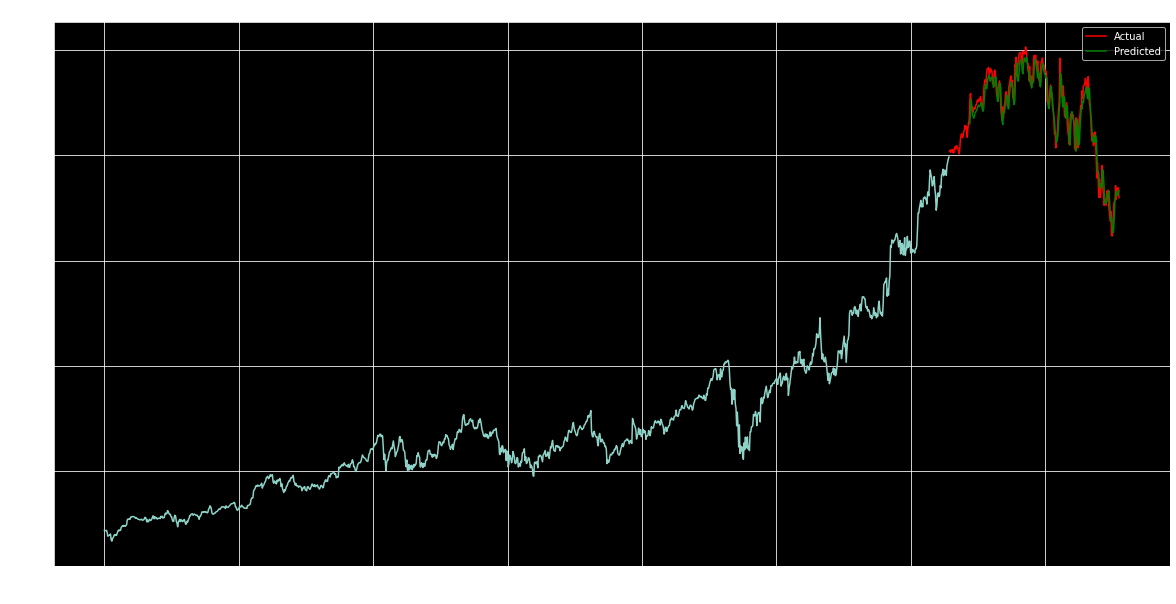

In [27]:
plt.figure(figsize=(20, 10))
plt.style.use("dark_background")
plt.plot(np.arange(len(df.Close)),df.Close)
plt.plot(np.arange(len(df.Close),len(df.Close)+len(testdata.Close)),testdata.Close,color='red',label= 'Actual')
plt.plot(np.arange(len(df.Close)+30,len(df.Close)+len(testdata.Close)),predicted_price,color = 'green',label='Predicted')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid()
plt.show()

#### Root mean square error

In [28]:
print('Mean squared error is',np.sqrt(mean_squared_error(y_test, predicted_price))), r2_score(y_test, predicted_price)
print('R2 score is',round(r2_score(y_test,predicted_price)*100,1),'%')

Mean squared error is 55.509348315205415
R2 score is 93.1 %


#### Future stock predictions

In [29]:
last_train_batch = inputClosing_scaled[-30:]
last_train_batch = last_train_batch.reshape((1, 30, 1))
model.predict(last_train_batch)

1/1 [==============================] - 0s 24ms/step


array([[0.89954704]], dtype=float32)

In [30]:
test_predictions = []

first_eval_batch = inputClosing_scaled[-30:]
current_batch = first_eval_batch.reshape((1, 30, 1))

for i in range(30):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [31]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions.shape

(30, 1)

In [32]:
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go

#### Plotting Future stock predictions

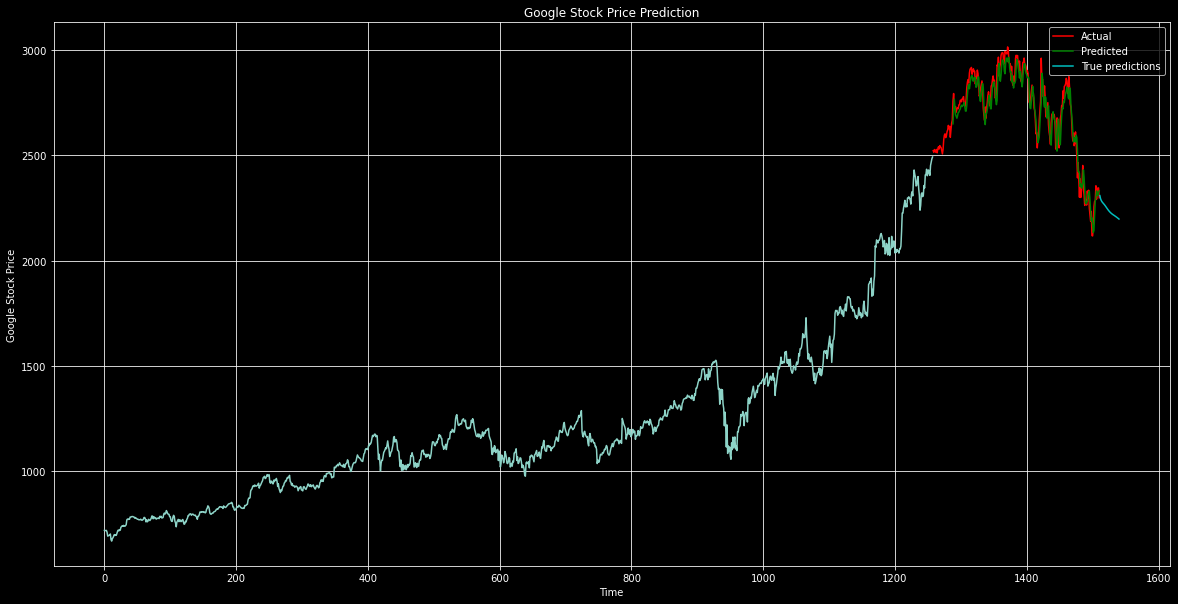

In [33]:
plt.figure(figsize=(20, 10))
plt.style.use("dark_background")
plt.plot(np.arange(len(df.Close)),df.Close)
plt.plot(np.arange(len(df.Close),len(df.Close)+len(testdata.Close)),testdata.Close,color='red',label= 'Actual')
plt.plot(np.arange(len(df.Close)+30,len(df.Close)+len(testdata.Close)),predicted_price,color = 'green',label='Predicted')
plt.plot(np.arange(len(df.Close)+len(testdata.Close),len(df.Close)+len(testdata.Close)+30),true_predictions,color = 'c',label='True predictions')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time',)
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid()
plt.show()